# Importing Useful libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

### Reading the data 

In [2]:
data = pd.read_csv('census_02.csv')
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Unity Plaza,Kirsty,Watson,30,Head,Single,Female,"Surveyor, land/geomatics",None,None
1,1,Unity Plaza,Jane,Bell,51,None,Single,Female,"Surveyor, insurance",None,Christian
2,2,Unity Plaza,Elliot,Hall,53,Head,Married,Male,Petroleum engineer,None,None
3,2,Unity Plaza,Gemma,Hall,52,Wife,Married,Female,"Radiographer, therapeutic",None,None
4,2,Unity Plaza,Owen,Hall,16,Son,NaN,Male,Student,None,NaN


### creating profile report on the data

In [3]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data description

In [4]:
data.shape

(10440, 11)

> The data has 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10437 non-null  object
 1   Street                         10440 non-null  object
 2   First Name                     10439 non-null  object
 3   Surname                        10439 non-null  object
 4   Age                            10440 non-null  object
 5   Relationship to Head of House  10440 non-null  object
 6   Marital Status                 8121 non-null   object
 7   Gender                         10440 non-null  object
 8   Occupation                     10440 non-null  object
 9   Infirmity                      10440 non-null  object
 10  Religion                       8061 non-null   object
dtypes: object(11)
memory usage: 897.3+ KB


In [6]:
data.isna().sum()

House Number                        3
Street                              0
First Name                          1
Surname                             1
Age                                 0
Relationship to Head of House       0
Marital Status                   2319
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2379
dtype: int64

In [7]:
data.duplicated().sum()

0

> The census dataset contains a total of 10440 entries with 11 unique features about each individual of the population. <br>
> It appears to be that all features are of object type, during proprocessing this would have to be adjusted.<br>
> There are missing values in `House Number`, `First Name, Surname, Marital Status, Religion` columns of the dataset<br>
> There are no duplicated entries.

# Data cleaning

## House Number

* Checking for the missing values in the House Number column

In [8]:
data[data['House Number'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1980,NaN,Shrinebait Road,Abigail,Owen,52,None,Single,Female,"Research officer, political party",None,None
6424,NaN,Marshall Squares,Connor,Pearce-Andrews,3,Son,NaN,Male,Child,None,NaN
9172,NaN,Stone Villages,Tony,Hurst,38,Head,Single,Male,"Therapist, drama",Physical Disability,Christian


> The entries on index 1980, 6424 and 9172 for House Number column are identified to be missing.<br>

We would use logic surrounding these missing entries to determine what house number are to be assigned to the missing values.

In [9]:
# dealing with the missing value on index 1980

data.loc[1978:1982]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1978,34,Shrinebait Road,Russell,Anderson,23,Husband,Married,Male,Building control surveyor,None,Sikh
1979,35,Shrinebait Road,Joyce,Campbell,58,Head,Single,Female,Exercise physiologist,None,None
1980,NaN,Shrinebait Road,Abigail,Owen,52,None,Single,Female,"Research officer, political party",None,None
1981,36,Shrinebait Road,Rita,Jones,24,Head,Single,Female,Occupational therapist,None,None
1982,36,Shrinebait Road,Dennis,Baxter,26,Partner,Single,Male,Materials engineer,None,None


In [10]:
data.loc[1980, 'House Number'] = '35'

In [11]:
# dealing with missing value in index 6424

data.loc[6420:6428]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6420,142,Marshall Squares,Marie,Martin-Smith,22,Daughter,Divorced,Female,University Student,None,Christian
6421,142,Marshall Squares,Maureen,Martin-Smith,19,Daughter,Single,Female,University Student,Disabled,Christian
6422,142,Marshall Squares,Gillian,Martin-Smith,17,Daughter,NaN,Female,Student,None,NaN
6423,143,Marshall Squares,Robert,Andrews,37,Head,Divorced,Male,Unemployed,None,None
6424,NaN,Marshall Squares,Connor,Pearce-Andrews,3,Son,NaN,Male,Child,None,NaN
6425,144,Marshall Squares,Diana,Bailey,50,Head,Single,Female,Unemployed,None,None
6426,144,Marshall Squares,Catherine,Bailey,13,Daughter,NaN,Female,Student,None,NaN
6427,144,Marshall Squares,Jonathan,Bailey,10,Son,NaN,Male,Student,None,NaN
6428,144,Marshall Squares,Antony,Bailey,7,Son,NaN,Male,Student,None,NaN


In [12]:
data.loc[6424, 'House Number'] = '143'

In [13]:
# dealing with missing value in index 9172

data.loc[9170:9174]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9170,202,Stone Villages,Laura,Green,85,Head,Married,Female,Retired Glass blower/designer,None,Methodist
9171,202,Stone Villages,Gordon,Green,86,Husband,Married,Male,Retired Electronics engineer,None,Methodist
9172,NaN,Stone Villages,Tony,Hurst,38,Head,Single,Male,"Therapist, drama",Physical Disability,Christian
9173,203,Stone Villages,Gary,Hurst,13,Son,NaN,Male,Student,None,NaN
9174,203,Stone Villages,Caroline,Hurst,11,Daughter,NaN,Female,Student,None,NaN


In [14]:
data.loc[9172, 'House Number'] = '203'

After treating the missing values, we check to see if other entries in the House Number column are in their proper format

In [15]:
for index, house_number in zip(range(len(data)), data['House Number']):
    try:
        int(house_number)
    except:
        print(index, house_number)

1393 six
2815  
2816  
2817  
7916  


In [16]:
# fixing the format of index 1393, from 'six' to 6
data.loc[1393, 'House Number'] = '6'

In [17]:
# fixing the empty fields [2815, 2816, 2817]
data.loc[2813:2820]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2813,55,Thomas Avenue,Ronald,Davies,3,Son,NaN,Male,Child,None,NaN
2814,56,Thomas Avenue,Caroline,Hussain,53,Head,Married,Female,"Designer, blown glass/stained glass",None,None
2815,,Thomas Avenue,Mathew,Hussain,56,Husband,Married,Male,Computer games developer,None,None
2816,,Thomas Avenue,Dawn,Hussain,16,Daughter,NaN,Female,Student,None,NaN
2817,,Thomas Avenue,Clare,Hussain,13,Daughter,NaN,Female,Student,None,NaN
2818,57,Thomas Avenue,Lynda,Mitchell,44,Head,Married,Female,Claims inspector/assessor,None,Christian
2819,57,Thomas Avenue,Dominic,Mitchell,49,Husband,Married,Male,Investment analyst,None,Christian
2820,57,Thomas Avenue,Wayne,Mitchell,16,Son,NaN,Male,Student,None,NaN


> All the missing entries above all have same Surname, signifying they have come from the same house hold

In [18]:
data.loc[2815:2817, 'House Number'] = '56'

In [19]:
# fixing the empty fields in 7916
data.loc[7914:7918]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7914,12,Chemist Parks,Ann,John,16,None,NaN,Female,Student,None,NaN
7915,13,Chemist Parks,Clare,Harris,33,Head,Single,Female,"Journalist, magazine",None,None
7916,,Chemist Parks,Ross,Whitehead,37,Partner,Single,Male,Civil Service administrator,None,None
7917,13,Chemist Parks,Dominic,Harris,2,Son,NaN,Male,Child,None,NaN
7918,14,Chemist Parks,Amanda,Vaughan,38,Head,Married,Female,Music therapist,None,None


In [20]:
data.loc[7916, 'House Number'] = 13

In [21]:
data['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [22]:
# properly formating entries of all house number to positive integers

data['House Number'] = (data['House Number']
                        .apply(lambda house_num: int(abs(float(house_num))) if isinstance(house_num, str) else house_num))

In [23]:
data['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## Street

In [24]:
for index, street in enumerate(data['Street']):
    if len(street)>1:
        pass
    else:
        print(index, street)                     

681  
6993  


> These index have no street name assigned to them

In [25]:
data[data['Street']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
681,12,,Sean,Jones,78,Head,Divorced,Male,Retired Clinical molecular geneticist,None,Christian
6993,1,,Tina,Jones,53,Head,Married,Female,Sports therapist,None,Christian


> Using logic suurrounding these missing entries to fill them up

In [26]:
data['Street'] = data['Street'].apply(lambda x: np.nan if x==' ' else x).fillna(method='bfill')
#Replacing null values with the values from the next row.

In [27]:
data.loc[6993:]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6993,1,Goldfinch Corner,Tina,Jones,53,Head,Married,Female,Sports therapist,None,Christian
6994,1,Goldfinch Corner,Timothy,Jones,54,Husband,Married,Male,Systems developer,Deaf,None
6995,1,Goldfinch Corner,Melanie,Jones,21,Daughter,Single,Female,University Student,None,Christian
6996,1,Goldfinch Corner,Maria,Jones,17,Daughter,NaN,Female,Student,None,NaN
6997,2,Goldfinch Corner,Lindsey,Taylor,21,Head,Single,Female,University Student,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
10435,1,Parker Ranch,Neil,Ali,22,Lodger,Single,Male,,None,None
10436,1,Parker Ranch,Damian,Lawrence,43,Lodger,Widowed,Male,Counselling psychologist,None,None
10437,1,Parker Ranch,Frederick,Wright,19,Lodger,Divorced,Male,University Student,None,None
10438,1,Lobster Chalet,Gordon,Stevenson,51,Head,Divorced,Male,Company secretary,None,Christian


## First Name and Surname

In [28]:
data[(data['First Name'].isna()) | (data['Surname'].isna())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6936,3,Butterfly Street,Denis,NaN,39,Head,Married,Male,"Buyer, industrial",None,None
8626,17,Pendragon Glen,NaN,Ross Russell,65,Husband,Married,Male,"Psychologist, prison and probation services",None,Christian


In [29]:
data.loc[6934:6938]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6934,2,Butterfly Street,Stuart,Williams,22,Head,Single,Male,University Student,None,None
6935,2,Butterfly Street,Marilyn,Wood,19,Partner,Single,Female,University Student,None,None
6936,3,Butterfly Street,Denis,NaN,39,Head,Married,Male,"Buyer, industrial",None,None
6937,3,Butterfly Street,Naomi,Jones,38,Wife,Married,Female,"Engineer, energy",None,None
6938,4,Butterfly Street,Shannon,Duffy,29,Head,Single,Female,PhD Student,None,Catholic


The wife of Jones would most likely bear the same name as her husband

In [30]:
data.loc[6936, 'Surname'] = 'Jones'

In [31]:
data.loc[8624:8628]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8624,16,Pendragon Glen,Melissa,Buckley,51,Head,Single,Female,Chartered accountant,None,Christian
8625,17,Pendragon Glen,Beth,Russell,63,Head,Married,Female,Print production planner,None,Christian
8626,17,Pendragon Glen,NaN,Ross Russell,65,Husband,Married,Male,"Psychologist, prison and probation services",None,Christian
8627,17,Pendragon Glen,Karl,Russell,35,Son,Single,Male,"Engineer, aeronautical",None,None
8628,18,Pendragon Glen,Abdul,Leach,28,Head,Single,Male,Interpreter,None,Sikh


In [32]:
data.loc[8626, 'First Name'] = 'Ross'

In [33]:
data.loc[8626, 'Surname'] = 'Russell'

In [34]:
data[data['First Name']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2231,6,Thomas Avenue,,Ellis,44,None,Single,Female,English as a second language teacher,None,Catholic
5902,10,Rice Light,,Thomas,45,Son,Single,Male,"Designer, blown glass/stained glass",None,Christian


In [35]:
data.loc[data['First Name']==' ', 'First Name'] = 'None'

## Age

In [36]:
data['Age'].unique()

array(['30', '51', '53', '52', '16', '89', '88', '26', '21', '42', '40',
       '47', '58', '63', '0', '54', '55', '36', '43', '44', '17', '14',
       '49', '18', '48', '50', '25', '23', '28', '22', '34', '11', '75',
       '74', '13', '2', '37', '32', '15', '56', '31', '41', '9', '8', '4',
       '20', '10', '6', '3', '66', '57', '62', '29', '64', '45', '38',
       '1', '39', '27', '46', '61', '35', '7', '86', '12', '72', '24',
       '60', '59', '69', '67', '19', '33', '65', '5', '85', '76', '81',
       '79', '73', '71', '78', '93', '84', '87', '77', '82', '70', '83',
       '60.8', '68', '80', '105', '101', '104', '99', '95', '97', '91',
       '92', '90', '94', '103', '98', '100', '102', '90.19894723', '22.1',
       '75.09491732', '59.70269332', '59.93917597', '63.93917597', '106',
       '70.36415261', '72.36415261', '55.20519416', '-1', '420', '0.5',
       'eight', '38.0', '107', 'six', '44.41866974', '66.00845207',
       '65.00845207', ' '], dtype=object)

The Age column is messy, having floating numbers and negative number, to treat this, we would;

> Convert all floating numbers to integers <br>
> Convert all negative numbers to positive integers.<br>
> Convert all numbers in text to their proper digit

Below are the index of the Age entries not having the proper format

In [37]:
print('index', '       ', 'AGE')
for index, age in enumerate(data['Age']):
    try:
        int(age)
    except:
        print(index,' =====>  ', age)

index         AGE
516  =====>   60.8
4515  =====>   90.19894723
4603  =====>   22.1
5744  =====>   75.09491732
5925  =====>   59.70269332
6165  =====>   59.93917597
6166  =====>   63.93917597
7328  =====>   70.36415261
7329  =====>   72.36415261
7336  =====>   55.20519416
7921  =====>   0.5
8630  =====>   eight
8985  =====>   38.0
9449  =====>   six
9680  =====>   44.41866974
9860  =====>   66.00845207
9861  =====>   65.00845207
10043  =====>    


In [38]:
# converting words to numbers 

data.loc[[8630,9449,10043]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8630,19,Pendragon Glen,Ryan,Wright,eight,Son,NaN,Male,Student,None,NaN
9449,4,Peterborough Avenue,Beth,Mason,six,Daughter,NaN,Female,Student,None,NaN
10043,13,Chesterpond Road,Francesca,Collins,,Head,Widowed,Female,Retired Paediatric nurse,None,Christian


In [39]:
data.loc[8630, 'Age'] = '8'
data.loc[9449, 'Age'] = '6'
data.loc[10043, 'Age'] = np.nan

In [40]:
data['Age'] = data['Age'].apply(lambda age: int(abs(float(age))) if isinstance(age, str) else age)

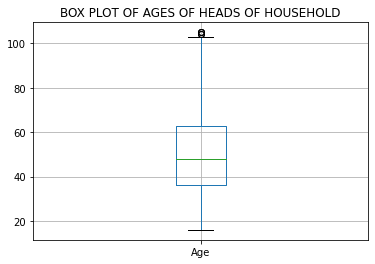

In [41]:
#A box plot showing the age distribution  of all head of the house hold

data.loc[data['Relationship to Head of House']=='Head', ['Age']].boxplot()
plt.title('BOX PLOT OF AGES OF HEADS OF HOUSEHOLD');

In [42]:
head_median_age = data.loc[data['Relationship to Head of House']=='Head', 'Age'].median()
head_median_age

48.0

In [43]:
# filling the missing value with the median age of the head of household

data['Age'].fillna(head_median_age, inplace=True)

In [44]:
data['Age'] = data['Age'].astype(int)

In [45]:
data['Age'].min(), data['Age'].max()

(0, 420)

* Maximum age appears to be 420, which is clearly an anormaly as the oldest person in UK is 109.

The error could be that an extra 0 was added to the age after entry, so i the 0 behind the number was removed and the proper age becomes 42.

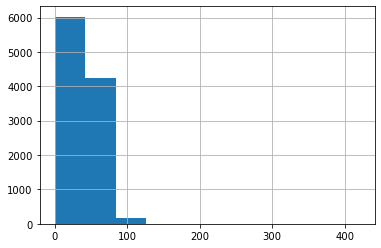

In [46]:
data['Age'].hist()

In [47]:
data[data['Age']>109]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7785,40,St.Matthewcharm Drive,Margaret,Clark,420,Daughter,Single,Female,"Geologist, wellsite",None,None


In [48]:
data['Age'].replace({420:42}, inplace=True)

In [49]:
data['Age'].max()

107

## Marital Status

In [50]:
data['Marital Status'].unique()

array(['Single', 'Married', nan, 'Divorced', 'Widowed', 'S', ' ', 'M'],
      dtype=object)

In [51]:
data[data['Marital Status'].isin(['S', 'M', ' '])]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
512,12,Davison Road,Georgina,Hopkins,30,Daughter,S,F-male,Furniture conservator/restorer,None,Christian
1010,124,Dublin Drive,Frank,Sharp,21,Head,,Male,University Student,None,Christian
3584,26,Barry Street,Lydia,Hughes,39,Head,S,Female,Chief Marketing Officer,None,Christian
7305,86,Goldfinch Corner,Neil,Hunt,37,Husband,M,Male,Unemployed,None,None


For entries on Marital Status as 'M' or 'S' signifies 'Married' and 'Single' respectively

In [52]:
data.loc[1008:1012]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1008,123,Dublin Drive,Joan,Jenkins,46,Wife,Married,Female,Physiotherapist,None,None
1009,123,Dublin Drive,Jasmine,Jenkins,14,Daughter,NaN,Female,Student,None,NaN
1010,124,Dublin Drive,Frank,Sharp,21,Head,,Male,University Student,None,Christian
1011,124,Dublin Drive,Charles,Price,19,None,Single,Male,University Student,None,Catholic
1012,125,Dublin Drive,Holly,Browne,59,Head,Single,Female,Building control surveyor,None,Catholic


A deep dive into the missing value for marital status in index 1010 shows that, he is a student who shares a household with Charles Price and is possibly Single given his age and him having no relationship with his household mate.

In [53]:
data['Marital Status'].replace({'S': 'Single', 'M': 'Married', ' ': 'Single'}, inplace=True)

In [54]:
data.loc[data['Marital Status'].isna(), 'Age'].value_counts()

16    170
15    158
14    149
13    148
10    139
11    136
4     135
17    134
8     130
9     128
7     127
5     125
6     115
12    115
2     112
1     110
3     107
0      79
18      2
Name: Age, dtype: int64

All missing values in the Marital Status column are minors under the age of 18, so we fill those entries with NA

In [55]:
data.loc[data['Marital Status'].isna(), 'Marital Status'] = 'NA'

## Gender

In [56]:
data['Gender'].value_counts()

Female    5536
Male      4894
F-male       3
             3
F            1
M            1
MALE         1
FEMALE       1
Name: Gender, dtype: int64

In [57]:
data['Gender'].replace({'F-male':'Female', 'F':'Female', 'M':'Male', 'MALE':'Male', 'FEMALE':'Female' }, inplace=True)

In [58]:
data[data['Gender']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5493,129,Rhubarb Fort,Abbie,Ryan,40,Head,Single,,Secondary school teacher,None,None
6176,78,Marshall Squares,Carole,Graham,40,Head,Single,,Unemployed,None,None
6336,121,Marshall Squares,Kimberley,Cole,35,Daughter,Divorced,,Logistics and distribution manager,None,None


The names Abbie and Carole are feminine, so their gender will be filled as Female.
Kimberley's relationship to head of house is Daughter, signifying she is also a Female

In [59]:
data['Gender'].replace({' ':'Female'}, inplace=True)

In [60]:
data['Gender'] = data['Gender'].str.title()

In [61]:
data['Gender'].value_counts()

Female    5544
Male      4896
Name: Gender, dtype: int64

## Infirmity

In [62]:
data['Infirmity'].value_counts()

None                   10348
Physical Disability       18
Disabled                  16
Mental Disability         14
Blind                     14
                          13
Deaf                      12
Unknown Infection          4
Female                     1
Name: Infirmity, dtype: int64

In [63]:
data['Infirmity'].replace({'Female': 'None', ' ': 'None'}, inplace=True)

In [64]:
data['Infirmity'].value_counts()

None                   10362
Physical Disability       18
Disabled                  16
Mental Disability         14
Blind                     14
Deaf                      12
Unknown Infection          4
Name: Infirmity, dtype: int64

## Religion

In [65]:
data['Religion'].value_counts(dropna=False)

None         3486
NaN          2379
Christian    2353
Catholic     1204
Methodist     759
Muslim        144
Sikh           65
Jewish         36
Quaker          4
                2
Nope            2
Private         1
Female          1
Undecided       1
Bahai           1
Sith            1
Baptist         1
Name: Religion, dtype: int64

In [66]:
data.loc[data['Religion'].isna(), 'Age'].value_counts()

16    172
15    158
14    149
13    148
10    139
11    136
4     135
17    134
8     130
9     128
7     127
5     125
6     115
12    115
2     112
1     110
3     107
0      79
18     49
19      7
22      2
21      1
29      1
Name: Age, dtype: int64

In [67]:
data.loc[data['Age']<18, 'Religion'].value_counts(dropna=False)

NaN    2319
Name: Religion, dtype: int64

All minors (under 18) are NaN entries so we fill them with "NA". A small fraction of the NaN entries are young adults within the age of 18 and 29 included, we also fill this with "NA".

In [68]:
data['Religion'].fillna('NA', inplace=True)

In [69]:
data['Religion'].replace({' ': 'NA', 'Nope': 'None', 'Undecided': 'None', 'Private':'None'}, inplace=True)

In [70]:
data['Religion'].value_counts(dropna=False)

None         3490
NA           2381
Christian    2353
Catholic     1204
Methodist     759
Muslim        144
Sikh           65
Jewish         36
Quaker          4
Baptist         1
Female          1
Bahai           1
Sith            1
Name: Religion, dtype: int64

In [71]:
data.loc[data['Religion']=='Female']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5331,25,Rhubarb Fort,Jason,Martin,44,Son,Single,Male,Oncologist,Mental Disability,Female


In [72]:
data.loc[5330:5333]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5330,25,Rhubarb Fort,Annette,Martin,75,Head,Widowed,Female,Unemployed,None,Christian
5331,25,Rhubarb Fort,Jason,Martin,44,Son,Single,Male,Oncologist,Mental Disability,Female
5332,26,Rhubarb Fort,Amy,Dyer,48,Head,Single,Female,Site engineer,None,Catholic
5333,27,Rhubarb Fort,Lewis,Abbott,77,Head,Single,Male,Retired Orthoptist,None,Christian


There is more likelihood that Jason Martin son of Annette Martin would be a Christain based on his mother's religion

In [73]:
data['Religion'].replace({'Female': 'Christian'}, inplace=True)

In [74]:
data.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [110]:
farm_count = 0
for job in data["Occupation"]:
    job = job.lower()
    if "farm" in job:
        farm_count += 1
    else: 
        pass
print(f"The number of farmers in the town is {farm_count}")

The number of farmers in the town is 19


## Feature Engineering

## Age Band

In [75]:
def AgeBand(age):
    if age<=4:
        return '0-4'
    elif age<=9:
        return '05-9'
    elif age<=14:
        return '10-14'
    elif age<=19:
        return '15-19'
    elif age<=24:
        return '20-24'
    elif age<=29:
        return '24-29'
    elif age<=34:
        return '30-34'
    elif age<=39:
        return '35-39'
    elif age<=44:
        return '40-44'
    elif age<=49:
        return '45-49'
    elif age<=54:
        return '50-54'
    elif age<=59:
        return '55-59'
    elif age<=64:
        return '60-64'
    elif age<=69:
        return '65-69'
    elif age<=74:
        return '70-74'
    elif age<=79:
        return '75-79'
    elif age<=84:
        return '80-84'
    elif age<=89:
        return '85-89'
    elif age<=94:
        return '90-94'
    else:
        return '95+'

In [76]:
data['Age Band'] = data['Age'].apply(AgeBand)

In [77]:
data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band
0,1,Unity Plaza,Kirsty,Watson,30,Head,Single,Female,"Surveyor, land/geomatics",None,None,30-34
1,1,Unity Plaza,Jane,Bell,51,None,Single,Female,"Surveyor, insurance",None,Christian,50-54
2,2,Unity Plaza,Elliot,Hall,53,Head,Married,Male,Petroleum engineer,None,None,50-54
3,2,Unity Plaza,Gemma,Hall,52,Wife,Married,Female,"Radiographer, therapeutic",None,None,50-54
4,2,Unity Plaza,Owen,Hall,16,Son,NA,Male,Student,None,NA,15-19
...,...,...,...,...,...,...,...,...,...,...,...,...
10435,1,Parker Ranch,Neil,Ali,22,Lodger,Single,Male,,None,None,20-24
10436,1,Parker Ranch,Damian,Lawrence,43,Lodger,Widowed,Male,Counselling psychologist,None,None,40-44
10437,1,Parker Ranch,Frederick,Wright,19,Lodger,Divorced,Male,University Student,None,None,15-19
10438,1,Lobster Chalet,Gordon,Stevenson,51,Head,Divorced,Male,Company secretary,None,Christian,50-54


## Employment Status

In [78]:
data['Occupation'].unique()

array(['Surveyor, land/geomatics', 'Surveyor, insurance',
       'Petroleum engineer', ..., 'Retired Retail banker',
       'Hotel Owner and Operator', 'Retired Database administrator'],
      dtype=object)

In [79]:
def employ_cat(category):
    category = category.lower()
    if 'retired' in category:
        return 'Retired'
    elif 'unemployed' in category:
        return 'Unemployed'
    elif 'university' in category or 'phd' in category:
        return 'University Student'
    elif 'student' == category:
        return 'Student'
    else:
        return 'Employed'

In [80]:
data['Employment Status'] = data['Occupation'].apply(employ_cat)

In [81]:
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band,Employment Status
0,1,Unity Plaza,Kirsty,Watson,30,Head,Single,Female,"Surveyor, land/geomatics",None,None,30-34,Employed
1,1,Unity Plaza,Jane,Bell,51,None,Single,Female,"Surveyor, insurance",None,Christian,50-54,Employed
2,2,Unity Plaza,Elliot,Hall,53,Head,Married,Male,Petroleum engineer,None,None,50-54,Employed
3,2,Unity Plaza,Gemma,Hall,52,Wife,Married,Female,"Radiographer, therapeutic",None,None,50-54,Employed
4,2,Unity Plaza,Owen,Hall,16,Son,NA,Male,Student,None,NA,15-19,Student


In [82]:
data['Employment Status'].value_counts()

Employed              6147
Student               1895
Retired               1071
Unemployed             696
University Student     631
Name: Employment Status, dtype: int64

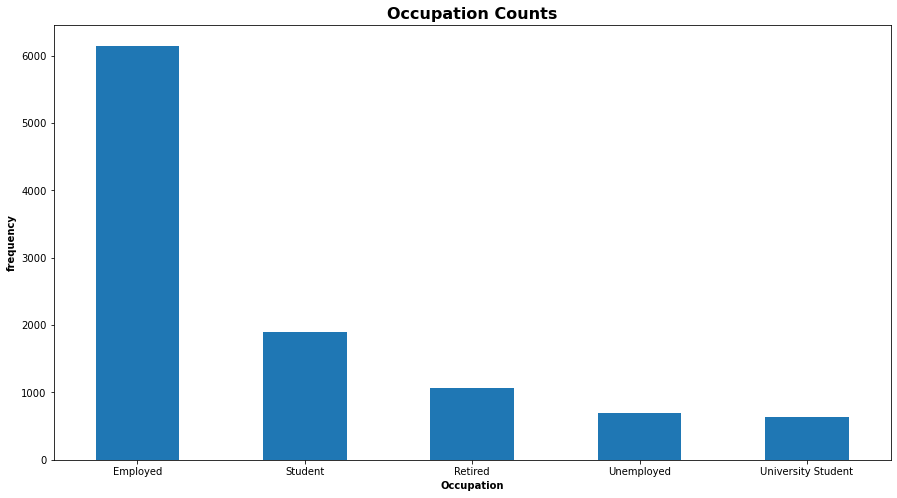

In [83]:
data['Employment Status'].value_counts().plot(kind='bar', figsize=(15, 8))
plt.title('Occupation Counts', fontweight='bold', fontsize=16)
plt.xlabel('Occupation', fontweight='bold')
plt.ylabel('frequency', fontweight='bold')
plt.xticks(rotation=0)
plt.savefig('Occupation Counts.jpeg');

# Analysis

## Age distribution pyramid

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10440 entries, 0 to 10439
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10440 non-null  int64 
 1   Street                         10440 non-null  object
 2   First Name                     10440 non-null  object
 3   Surname                        10440 non-null  object
 4   Age                            10440 non-null  int64 
 5   Relationship to Head of House  10440 non-null  object
 6   Marital Status                 10440 non-null  object
 7   Gender                         10440 non-null  object
 8   Occupation                     10440 non-null  object
 9   Infirmity                      10440 non-null  object
 10  Religion                       10440 non-null  object
 11  Age Band                       10440 non-null  object
 12  Employment Status              10440 non-null  object
dtypes

In [85]:
df = data[['Age Band', 'Gender','Age']]
df

,Age Band,Gender,Age
0,30-34,Female,30
1,50-54,Female,51
2,50-54,Male,53
3,50-54,Female,52
4,15-19,Male,16
...,...,...,...
10435,20-24,Male,22
10436,40-44,Male,43
10437,15-19,Male,19
10438,50-54,Male,51


In [86]:
age_pyramid = df.pivot_table(values='Age', index='Age Band', columns=['Gender'], aggfunc='count')
age_pyramid

Gender,Female,Male
Age Band,,
0-4,263,280
05-9,282,343
10-14,359,328
15-19,393,388
20-24,429,329
24-29,378,339
30-34,407,339
35-39,489,354
40-44,437,392


In [87]:
age_pyramid['Female'] = age_pyramid['Female']*-1
age_pyramid = age_pyramid.reset_index().sort_values(by='Age Band', ascending=False).reset_index(drop=True)
age_pyramid

Gender,Age Band,Female,Male
0,95+,-18,18
1,90-94,-6,14
2,85-89,-42,54
3,80-84,-115,80
4,75-79,-122,121
5,70-74,-215,152
6,65-69,-228,203
7,60-64,-278,241
8,55-59,-275,253
9,50-54,-350,328


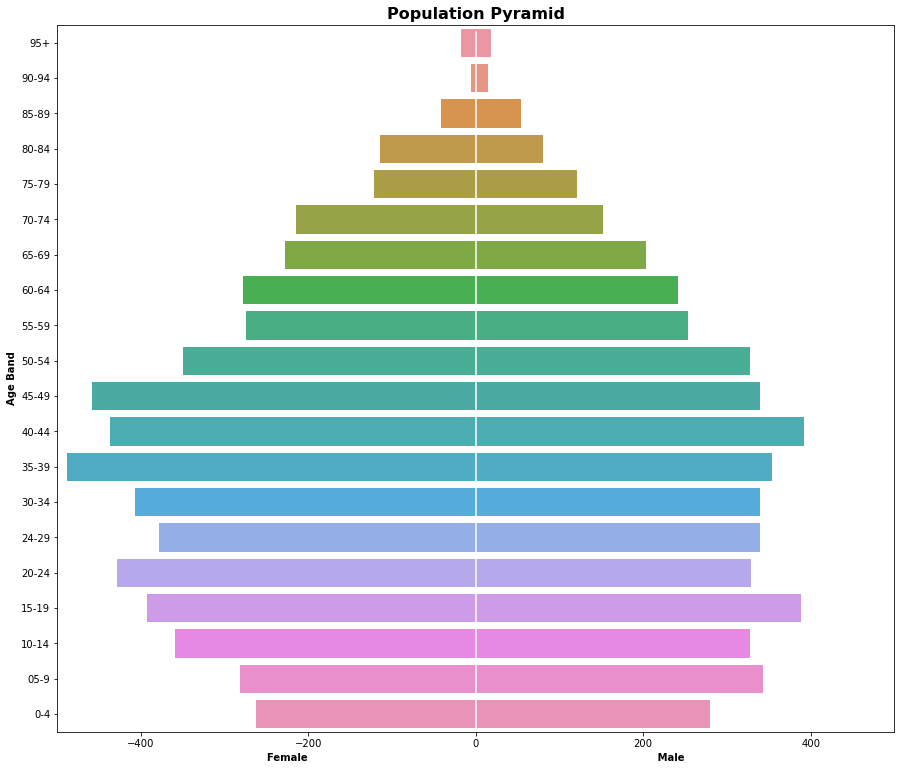

In [88]:
plt.figure(figsize=(15,13))
bar_plot = sns.barplot(x='Male', y='Age Band', data=age_pyramid, order=age_pyramid['Age Band'])
bar_plot = sns.barplot(x='Female', y='Age Band', data=age_pyramid, order=age_pyramid['Age Band'])
plt.axvline(color='white', ymax=0.99)
plt.xlim(-500, 500)
plt.xlabel('Female'+' '*100+'Male', fontweight='bold')
plt.ylabel('Age Band', fontweight='bold')
plt.title('Population Pyramid', fontsize=16, fontweight='bold')
plt.savefig('Population Pyramid.jpeg');

# Unemployment Trend

In [89]:
df = data[['Age Band', 'Employment Status', 'Age']]
df = df[df['Employment Status']=='Unemployed']
df

,Age Band,Employment Status,Age
15,24-29,Unemployed,26
31,40-44,Unemployed,43
37,30-34,Unemployed,34
45,24-29,Unemployed,25
86,20-24,Unemployed,22
...,...,...,...
10339,45-49,Unemployed,45
10389,20-24,Unemployed,23
10397,35-39,Unemployed,37
10417,35-39,Unemployed,39


In [90]:
trend = df.pivot_table(values='Employment Status', columns='Employment Status', index='Age Band', aggfunc='count').fillna(0)
trend

Employment Status,Unemployed
Age Band,
20-24,28
24-29,73
30-34,77
35-39,97
40-44,89
45-49,95
50-54,78
55-59,54
60-64,46


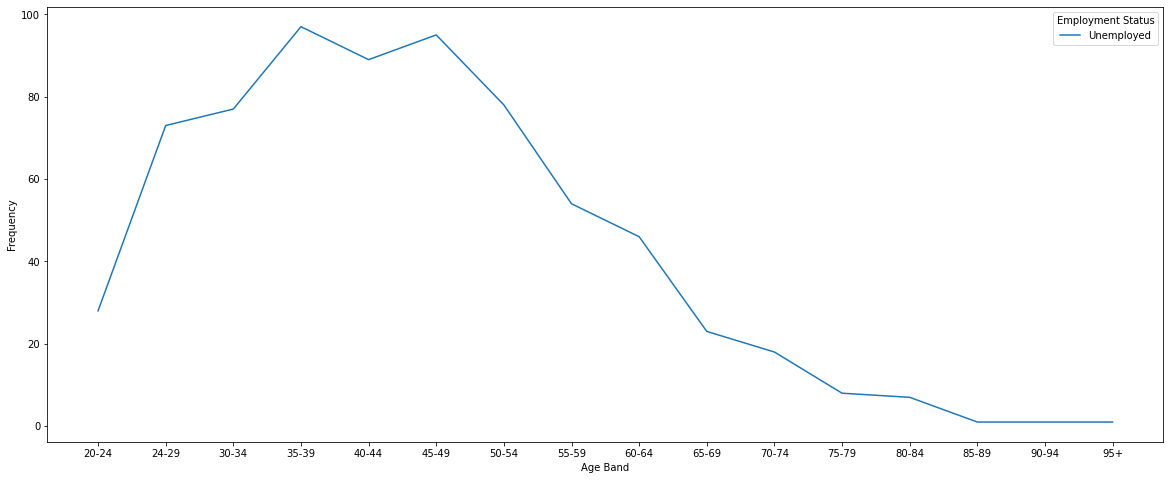

In [91]:
trend.plot(figsize=(20,8))
plt.xticks(range(len(trend)), trend.index)
plt.xlabel("Age Band")
plt.ylabel("Frequency")
plt.savefig('Unemployment Trend fig1.jpeg');

Text(0, 0.5, 'Frequency')

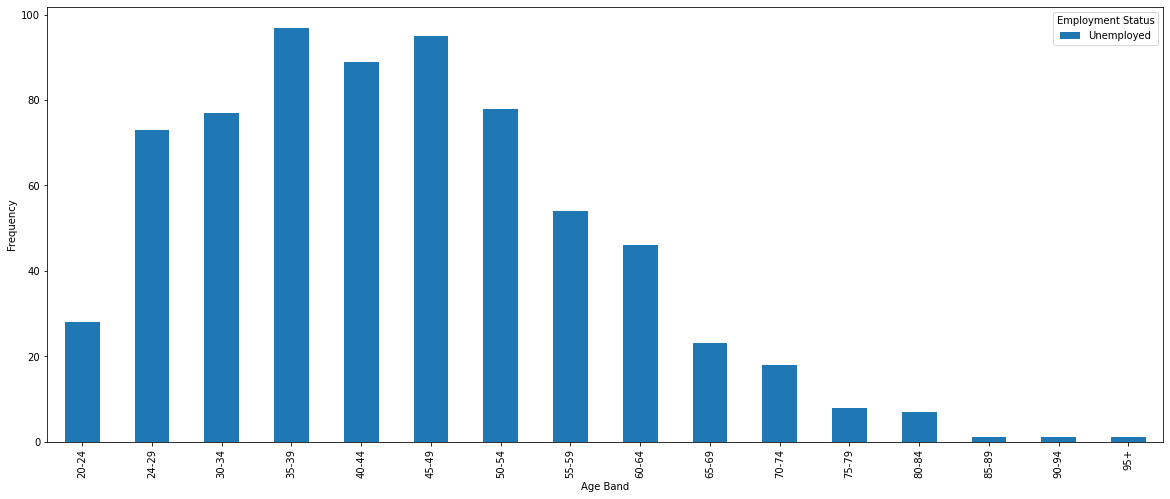

In [92]:
trend.plot(kind='bar', figsize=(20,8))
plt.xlabel("Age Band")
plt.ylabel("Frequency")

In [93]:
trend['Unemployed'].sum()

696

## Religions affiliation

In [94]:
df = data[['Religion', 'Age']]
df

,Religion,Age
0,None,30
1,Christian,51
2,None,53
3,None,52
4,NA,16
...,...,...
10435,None,22
10436,None,43
10437,None,19
10438,Christian,51


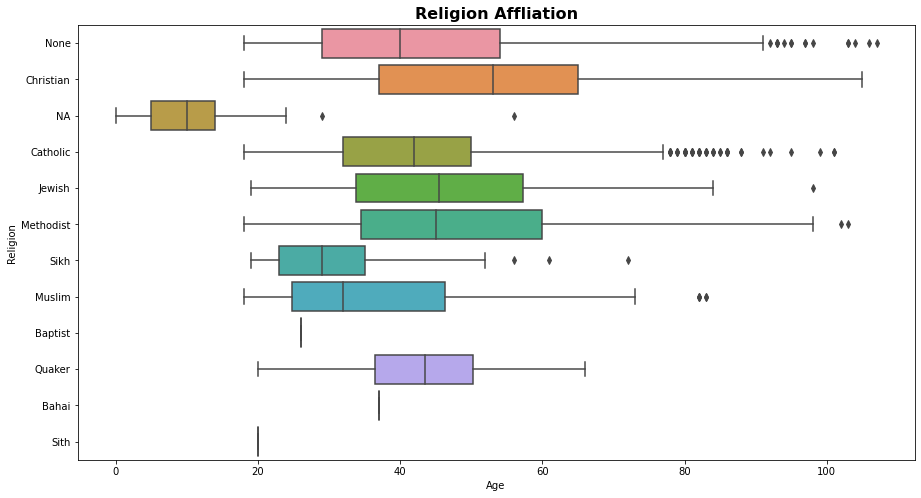

In [95]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Age', y='Religion')
plt.title('Religion Affliation', fontweight='bold', fontsize=16);

# Divorced and Married rate

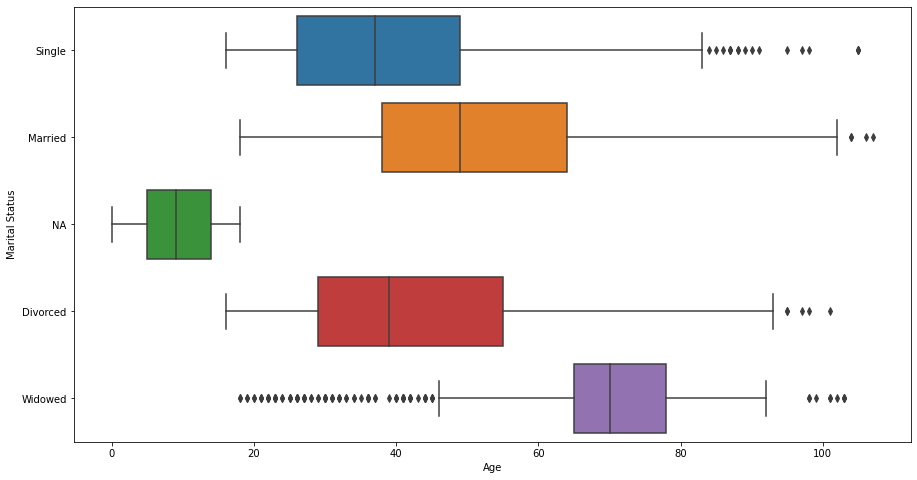

In [96]:
df = data[['Marital Status', 'Age']]
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Age', y='Marital Status')

In [97]:
marital_rate = df['Marital Status'].value_counts().reset_index()
marital_rate.set_index('index', inplace=True)
marital_rate

,Marital Status
index,
Single,3619
Married,3000
NA,2319
Divorced,973
Widowed,529


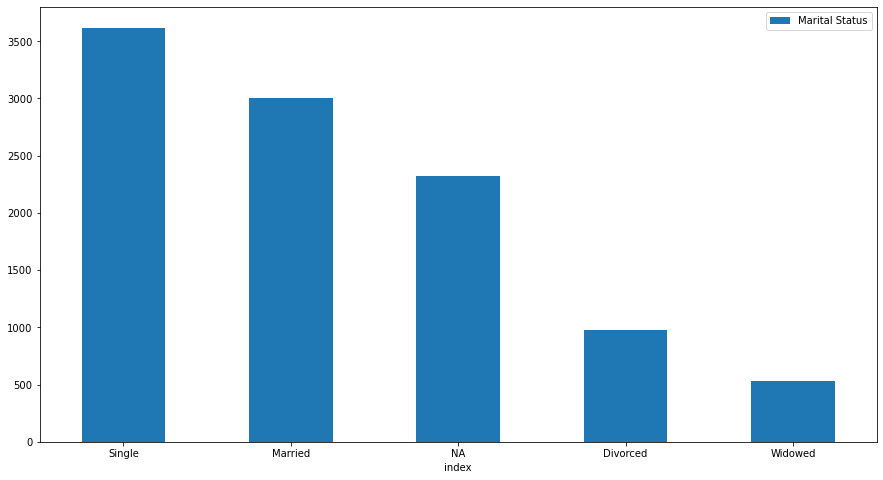

In [98]:
marital_rate.plot(kind='bar', figsize=(15,8))
plt.xticks(rotation=0);

In [115]:
data[data["Marital Status"].isin(["Divorced",'Married'])]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Band,Employment Status
2,2,Unity Plaza,Elliot,Hall,53,Head,Married,Male,Petroleum engineer,None,None,50-54,Employed
3,2,Unity Plaza,Gemma,Hall,52,Wife,Married,Female,"Radiographer, therapeutic",None,None,50-54,Employed
5,3,Unity Plaza,Shaun,Young,89,Head,Married,Male,Retired Medical physicist,None,Christian,85-89,Retired
6,3,Unity Plaza,Maureen,Young,88,Wife,Married,Female,Retired Patent attorney,None,Christian,85-89,Retired
13,7,Unity Plaza,Marilyn,Johnson,58,Head,Married,Female,Musician,None,None,55-59,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10427,1,Parkin Castle,Conor,James,42,Husband,Married,Male,"Psychotherapist, dance movement",None,None,40-44,Employed
10432,1,Parker Ranch,Zoe,Patterson,33,Head,Married,Female,Unemployed,None,Muslim,30-34,Unemployed
10433,1,Parker Ranch,Shane,Patterson,36,Husband,Married,Male,Games developer,None,Muslim,35-39,Employed
10437,1,Parker Ranch,Frederick,Wright,19,Lodger,Divorced,Male,University Student,None,None,15-19,University Student


# Crude Birth Rate



In [100]:
totalpopulation = len(data)

In [101]:
livebirths = len(data[data['Age'] == 0])
crudebirthrate = (livebirths/totalpopulation)*1000
crudebirthrate

7.567049808429119

In [117]:
babies0 = data['Age'] == 0
babies4 = data['Age'] == 4
babies8 = data['Age'] == 8


crudebr = (len(data[babies0])/totalpopulation)*1000 

crudebr4year = (len(data[babies4])/len(data))*1000

print(f"Present Crude Birthrate per 1000: {crudebr}")
print(f"Previous Crude Birthrate per 1000: {crudebr4year}")


print(f"Present Crude Birth Rate Change from Previous per 1000: {crudebr-crudebr4year}")

Present Crude Birthrate per 1000: 7.567049808429119
Previous Crude Birthrate per 1000: 12.931034482758621
Present Crude Birth Rate Change from Previous per 1000: -5.363984674329502


## Occupancy Rate

In [106]:
household= data.groupby(['House Number', 'Street']).size().reset_index()
household

,House Number,Street,0
0,1,Aethelred Stream,5
1,1,Ahmed Lodge,1
2,1,Albans Stravenue,1
3,1,Ali Drive,4
4,1,Barker Pine,1
...,...,...,...
4168,238,Marshall Squares,2
4169,238,Thomas Avenue,5
4170,239,Marshall Squares,4
4171,239,Thomas Avenue,2
